# <center> Rajat Kumar (C0912858) | Assignment 1

In [1]:
!pip install newsapi


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install yahoo_fin


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install GoogleNews


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importing all the required libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
import yfinance as yf
from yahoo_fin import news
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
import newspaper
import requests

import warnings
# Hide the display of warnings
warnings.filterwarnings("ignore")

C:\Users\rajat\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [6]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

### <center> Creating classes and functions to avoid code redundancy

In [7]:
# Creating a class to encapsulate all the necessary functions for this project
class nlp_on_news():
    
    # Creating the class constructor so the object of the class can be initiated
    def __init__(self):
        pass
    
    # Creating a function to clean the text, remove stopwords, lemmatize the tokens and create a string with the filtered words remaining
    # INPUT <- Text to be filtered before sentiment analysis
    # OUTPUT -> Filtered Text
    def cleaning_text(self, text):
        # Splitting the text
        split_text = word_tokenize(text.lower())
        # Removing the stop words
        filtered_words = [token for token in split_text if token not in stopwords.words('english')]
        # Lemmatizing the tokens
        lemmatizer = WordNetLemmatizer()
        words_lemmatized = [lemmatizer.lemmatize(token) for token in filtered_words]
        # Joining the tokens back into a string
        result = ' '.join(words_lemmatized)
        return result
    
    # Creating function to return whether the given sentence has a positive tone or negative
    # INPUT <- Sentencce text
    # Output -> Tone of the sentence (positive or negative)
    def sentiment_score_calculation(self, text):
        score_calculation = SentimentIntensityAnalyzer()
        scores = score_calculation.polarity_scores(text)
        return 1 if scores['pos'] > 0 else 0
    
    # Creating the function to scrape the new article data of 50 companies from Yahoo Finanace and generate a DataFrame with the company details and news
    # INPUT <- List of company abbreviation as per market listing
    # OUTPUT -> DataFrame with the columns: ['company_name', 'article_date', 'news_title', 'news_summary', 'nlp_score']
    def dataframe_generation(self, company_names_mexico):
        
        # API Key and URL to access the news from the API
        api_key = "3e298c349769484284ed687241c841dd"
        base_url = 'https://newsapi.org/v2/everything'    

        news_list = []
        # Iterate through all companies
        for company in company_names_mexico:
            parameters = {'q': company,
                          'apiKey': api_key,
                          'sortBy': 'relevancy',
                          'language': 'en',}

            # Extracting articles for each company
            response = requests.get(base_url, parameters)
            data = response.json()
            news_list.append(data)
        
        # Creating a DataFrame with the desired schema
        df = pd.DataFrame(columns=['company_name', 'article_date', 'news_title', 'news_summary', 'nlp_score'])
        not_available_set = set()

        loc = 0
        # Iterating through all the 50 companies articles
        for i in news_list:
            if i['status'] == 'ok':
                # Scraping 5 news articles from Yahoo Finance
                for j in i['articles'][:5]:
                    # Adding the company related data to the DataFrame rows
                    df = df.append({'company_name' : company_names_mexico[loc],
                                    'article_date' : j['publishedAt'],
                                    'news_title' : j['title'],
                                    'news_summary' : j['description'],
                                    'nlp_score' : nlp_obj.sentiment_score_calculation(nlp_obj.cleaning_text(j['title']))},
                                    ignore_index=True)
            # Location variable to remeber the Company Name
            loc += 1

        return df


# Yahoo Finance API Testing (Might take huge time to run)

In [8]:
# Creating a list of 72 Public Companies in Mexico
mexico_72_public_companies = ['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX',
                               'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX',
                               'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX',
                               'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX',
                               'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX',
                               'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX',
                               'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX']

# Passing the list in a function to pull the financial news article for each company and create a DataFrame out of it
df = pd.DataFrame(columns=['company_name', 'company_abbreviation', 'news_title', 'news_summary', 'nlp_tone'])
not_available_set = set()

for i in mexico_72_public_companies:
    try:
        news_info = news.get_yf_rss(i)[:5]
        for j in range(5):
            df = df.append({'company_name' : yf.Ticker(i).info['longName'],
                            'company_abbreviation' : i,
                            'news_title' : news_info[j]['title'],
                            'news_summary' : news_info[j]['summary']},
                            ignore_index=True)

    except:
        not_available_set.add(i)

print(f'The Number of companies available on Yahoo Finance News API for Mexico out of 72 companies are: {len(df["company_name"].unique())}')

The Number of companies available on Yahoo Finance News API for Mexico out of 72 companies are: 11


# Google News API Testing (Commented out this code as it takes huge load of time to run. Output snippet mentioned in report)

In [9]:
"""
# Extracting Articles from Google News API
companies_72 = ['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX',
               'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX',
               'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX',
               'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX',
               'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX',
               'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX',
               'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX']
news_list = []
for i in companies_72:
    # Creating Object
    googlenews = GoogleNews()

    # Extracting News
    googlenews.search(i)

    # Fetch news article for page 1
    googlenews.get_page(1)

    # Fetching news result
    news_results = googlenews.results()

    # Get the titles and links of 5 news articles for each company
    for news in news_results[:5]:
        news_list.append(news)

# Printing 
print(f'Number of companies extracted from Google News API out of 72: {len(news_list)/5}')
"""

"\n# Extracting Articles from Google News API\ncompanies_72 = ['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX',\n               'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX',\n               'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX',\n               'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX', 'LABB.MX',\n               'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX', 'KOFUBL.MX',\n               'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LABB.MX', 'ALSEA.MX', 'ALFAA.MX', 'ALSEA.MX', 'ASURB.MX', 'BIMBOA.MX', 'GCC.MX',\n               'KOFUBL.MX', 'LABB.MX', 'ORBIA.MX', 'WALMEX.MX', 'GAPB.MX', 'LA

# News API (26 Companies)

In [10]:
# Creating a list of 132 Public Companies in Mexico
company_names_mexico = ["Grupo Bimbo", "Grupo Elektra", "Grupo Financiero Banorte", "América Móvil", "Grupo Aeroportuario del Sureste", "Grupo México", "Cemex",
                        "Grupo Televisa", "Grupo Carso", "Grupo Sanborns", "Grupo Alfa", "Grupo Lala", "Grupo Herdez", "Grupo Gigante", "Grupo Lamosa", "Grupo Bafar",
                        "Grupo Gentera", "Grupo Modelo", "Grupo Simec", "Grupo Industrial Saltillo", "Grupo Kuo", "Grupo Rotoplas",
                        "Grupo Aeroportuario del Pacífico", "Grupo Financiero Inbursa", "Grupo Gondi", "Grupo Aeroportuario del Norte",
                        "Grupo Aeroportuario del Centro Norte", "Grupo Financiero Interacciones", "Grupo Elektra", "Grupo Aeroportuario del Sur", "Grupo Carso",
                        "Grupo Grupo México", "Grupo Sanborns", "Grupo Gigante", "Grupo Alfa", "Grupo Herdez", "Grupo Bimbo", "Grupo Financiero Inbursa", "Grupo Kuo",
                        "Grupo Sanborns", "Grupo Modelo", "Grupo Simec", "Grupo Industrial Saltillo", "Grupo Aeroportuario del Sureste", "Grupo Simec", "Grupo Carso",
                        "Grupo Elektra", "Grupo Rotoplas", "Grupo Bafar", "Grupo Aeroportuario del Pacífico", "Grupo Gentera", "Grupo Kuo",
                        "Grupo Financiero Interacciones", "Grupo Elektra", "Grupo Aeroportuario del Norte", "Grupo Kuo", "Grupo Rotoplas", "Grupo Carso",
                        "Grupo México", "Grupo Lala", "Grupo Gigante", "Grupo Alfa", "Grupo Herdez", "Grupo Bimbo", "Grupo Financiero Inbursa", "Grupo Kuo",
                        "Grupo Sanborns", "Grupo Modelo", "Grupo Simec", "Grupo Industrial Saltillo", "Grupo Aeroportuario del Sureste", "Grupo Simec", "Grupo Carso",
                        "Grupo Elektra", "Grupo Rotoplas", "Grupo Bafar", "Grupo Aeroportuario del Pacífico", "Grupo Gentera", "Grupo Kuo",
                        "Grupo Financiero Interacciones", "Grupo Elektra", "Grupo Aeroportuario del Norte", "Grupo Kuo", "Grupo Rotoplas", "Grupo Carso",
                        "Grupo México", "Grupo Lala", "Grupo Gigante", "Grupo Alfa", "Grupo Herdez", "Grupo Bimbo", "Grupo Financiero Inbursa", "Grupo Kuo", "Grupo Sanborns", "Grupo Modelo", "Grupo Simec", "Grupo Industrial Saltillo", "Grupo Aeroportuario del Sureste", "Grupo Simec", "Grupo Carso", "Grupo Elektra", "Grupo Rotoplas", "Grupo Bafar", "Grupo Aeroportuario del Pacífico", "Grupo Gentera", "Grupo Kuo", "Grupo Financiero Interacciones", "Grupo Elektra", "Grupo Aeroportuario del Norte", "Grupo Kuo", "Grupo Rotoplas", 'Grupo Elektra',
                        'Grupo Gentera', 'Grupo Gondi', 'Grupo Financiero Interacciones', 'Grupo Sanborns', 'Grupo Herdez', 'Grupo Kuo', 'Grupo Grupo México',
                        'Grupo Gigante', 'Grupo Alfa', 'Grupo Financiero Inbursa', 'Grupo Modelo', 'Grupo Simec', 'Grupo Industrial Saltillo',
                        'Grupo Aeroportuario del Sureste', 'Grupo Carso', 'Grupo Bafar', 'Grupo Aeroportuario del Pacífico', 'Grupo Aeroportuario del Norte',
                        'Grupo Lala', 'Grupo Rotoplas', 'Grupo Mexico', 'Grupo Salinas', 'Grupo Industrial Maseca', 'Grupo Lamosa', 'Grupo Bimbo', 'Grupo TMM',
                        'Grupo Tampico', 'Grupo Posadas', 'Grupo OMA', 'Grupo Senda', 'Grupo Vitro', 'Grupo Sare', 'Grupo Simec', 'Grupo Bimbo', 'Grupo Gepp',
                        'Grupo Cementos Chihuahua', 'Grupo Comercial Chedraui', 'Grupo Famsa', 'Grupo Lamosa', 'Grupo Mexico', 'Grupo Bafar', 'Grupo Herdez',
                        'Grupo Cemex', 'Grupo Xcaret', 'Grupo Fertinal', 'Grupo Bimbo', 'Grupo México']

# creating an object for the class to call the function
nlp_obj = nlp_on_news()

# Passing the list in a function to pull the financial news article for each company and create a DataFrame out of it
result_df = nlp_obj.dataframe_generation(company_names_mexico)

In [11]:
# Number of unique companies available through APIs
len(result_df['company_name'].unique())

26

In [12]:
# Count of number of rows where each row represents a news article
result_df.count()[0]

383

In [13]:
# Adding column nlp_tone(positive, negative) as per nlp_score (0, 1)
result_df.loc[result_df['nlp_score'] == 1, 'nlp_tone'] = 'positive'
result_df.loc[result_df['nlp_score'] == 0, 'nlp_tone'] = 'negative'

In [14]:
# Display top 15 rows of the DataFrame
result_df.head(15)

,company_name,article_date,news_title,news_summary,nlp_score,nlp_tone
0,Grupo Bimbo,2024-02-01T19:45:34Z,Who Owns Takis? – Takis Company History,"Takis, the popular rolled corn tortilla chip s...",0,negative
1,Grupo Bimbo,2024-01-28T10:10:42Z,"Grupo Bimbo, S.A.B. de C.V. (OTCMKTS:GRBMF) Sh...","Grupo Bimbo, S.A.B. de C.V. (OTCMKTS:GRBMF – G...",1,positive
2,Grupo Bimbo,2024-01-26T17:08:54Z,"Grupo Bimbo, S.A.B. de C.V. (OTCMKTS:BMBOY) Sh...","Grupo Bimbo, S.A.B. de C.V. (OTCMKTS:BMBOY – G...",1,positive
3,Grupo Bimbo,2024-01-26T06:56:46Z,Utz Brands (NYSE:UTZ) and Grupo Bimbo (OTCMKTS...,Utz Brands (NYSE:UTZ – Get Free Report) and Gr...,0,negative
4,Grupo Bimbo,2024-01-31T15:13:25Z,PHD retains HP’s global media account,The retention continues a relationship that be...,0,negative
5,Grupo Financiero Banorte,2024-02-02T15:15:00Z,Finovate Global Mexico: Banorte’s Digital Bank...,This week in Finovate Global we take a look at...,1,positive
6,Grupo Financiero Banorte,2024-01-31T10:16:42Z,"Short Interest in Grupo Financiero Banorte, S....","Grupo Financiero Banorte, S.A.B. de C.V. (OTCM...",1,positive
7,Grupo Financiero Banorte,2024-01-17T21:30:39Z,Mexico's Banorte posts 13% profit jump in Q4 p...,(marketscreener.com) Mexico's Grupo\nFinancier...,1,positive
8,Grupo Financiero Banorte,2024-01-17T21:12:00Z,Mexico's Banorte posts 13% profit jump in Q4,(marketscreener.com) Mexico's Grupo\nFinancier...,1,positive
9,Grupo Financiero Banorte,2024-01-29T20:46:50Z,Mexico's Banorte launches digital bank bineo,"(marketscreener.com) Grupo Financiero Banorte,...",0,negative


In [15]:
# Set display options to show full content of cells so we can view the complete statement and verify
pd.set_option('display.max_colwidth', None)

# <center> Validation

### <center> Example of positive tone

In [16]:
# Verifying one random Positive news summary
print(result_df[result_df['nlp_tone'] == 'positive'][5:6][['company_name', 'news_title', 'news_summary', 'nlp_tone']])

               company_name                                    news_title  \
8  Grupo Financiero Banorte  Mexico's Banorte posts 13% profit jump in Q4   

                                                                                                                                                                                                                                                                news_summary  \
8  (marketscreener.com) Mexico's Grupo\nFinanciero Banorte reported on Wednesday a 13%\nincrease in its fourth-quarter net profit, hitting 13.04 billion\npesos.\n Revenue for the group, which owns one of the country's\nlargest banks and pension funds, totaled 34.89 b…   

   nlp_tone  
8  positive  


In [17]:
# Verifying one random Positive news summary
print(result_df[result_df['nlp_tone'] == 'positive'][3:4][['company_name', 'news_title', 'news_summary', 'nlp_tone']])

               company_name  \
6  Grupo Financiero Banorte   

                                                                                      news_title  \
6  Short Interest in Grupo Financiero Banorte, S.A.B. de C.V. (OTCMKTS:GBOOY) Increases By 15.4%   

                                                                                                                                                                                                                                                           news_summary  \
6  Grupo Financiero Banorte, S.A.B. de C.V. (OTCMKTS:GBOOY – Get Free Report) was the recipient of a large increase in short interest in January. As of January 15th, there was short interest totalling 7,500 shares, an increase of 15.4% from the December 31st tot…   

   nlp_tone  
6  positive  


## The above 2 outputs shows that the news is mapped to the right company (Grupo Financiero Banorte) verified from company name and the name present in the News title and summary. Aslo, the nlp_status is positive as the news speaks about the profits

### <center> Example of a negative tone

In [18]:
# Verifying one random Negative news summary
print(result_df[result_df['nlp_tone'] == 'negative'][16:17][['company_name', 'news_title', 'news_summary', 'nlp_tone']])

      company_name  \
33  Grupo Televisa   

                                                                      news_title  \
33  Grupo Televisa, S.A.B. (NYSE:TV) Receives $6.02 Consensus PT from Brokerages   

                                                                                                                                                                                                                                                            news_summary  \
33  Shares of Grupo Televisa, S.A.B. (NYSE:TV – Get Free Report) have received an average recommendation of “Moderate Buy” from the seven research firms that are presently covering the company, MarketBeat reports. Three equities research analysts have rated the s…   

    nlp_tone  
33  negative  


In [19]:
# Verifying one random Negative news summary
print(result_df[result_df['nlp_tone'] == 'negative'][63:64][['company_name', 'news_title', 'news_summary', 'nlp_tone']])

                        company_name  \
124  Grupo Aeroportuario del Sureste   

                                                                                                               news_title  \
124  Campbell & CO Investment Adviser LLC Takes Position in Grupo Aeroportuario del Sureste, S. A. B. de C. V. (NYSE:ASR)   

                                                                                                                                                                                                                                                             news_summary  \
124  Campbell & CO Investment Adviser LLC bought a new stake in shares of Grupo Aeroportuario del Sureste, S. A. B. de C. V. (NYSE:ASR – Free Report) during the 3rd quarter, according to its most recent disclosure with the Securities and Exchange Commission. The i…   

     nlp_tone  
124  negative  


## The above 2 outputs shows that the news is mapped to the right companies (Grupo Televisa and Grupo Aeroportuario) as per the company names and the name mentioned in the news title and summary. Aslo, the nlp_status is negative as the news talks about topic which is not in favour of the company and the company receiving average recommendation

# <center> Data Visualization

([<matplotlib.patches.Wedge at 0x23d0b07a890>,
 [Text(-0.031575723782550476, 1.0995467128174266, 'negative'),
  Text(0.03444635643222858, -1.1995055016666427, 'positive')],
 [Text(-0.017223122063209348, 0.599752752445869, '50.9%'),
  Text(0.020093707918800004, -0.6997115426388748, '49.1%')])

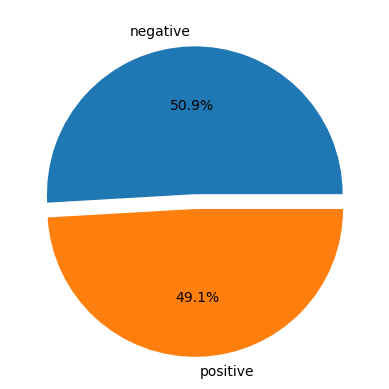

In [20]:
#Creating a pie chart to represent the visualization of the distribution of positive and negative news article summaries
plt.pie([result_df['nlp_tone'].value_counts()[0], result_df['nlp_tone'].value_counts()[1]], [0, 0.1],
        [result_df['nlp_tone'].unique()[0], result_df['nlp_tone'].unique()[1]], autopct = '%.1f%%')

### As we can clearly view in the above Pie Chart that the tone of 49.2% of the news articles are Positive and 50.8% have negative tone

In [21]:
# Exported the DataFrame as a csv file to analyze it on Power BI
result_df.to_csv('data_mining_assignment_1.csv')